In [1]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score

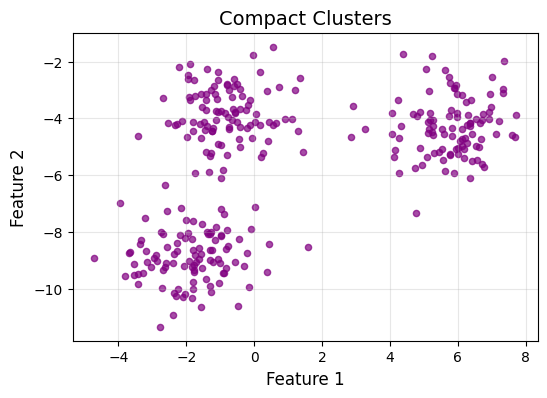

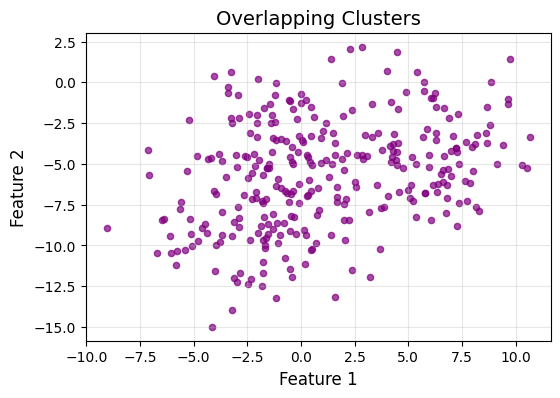

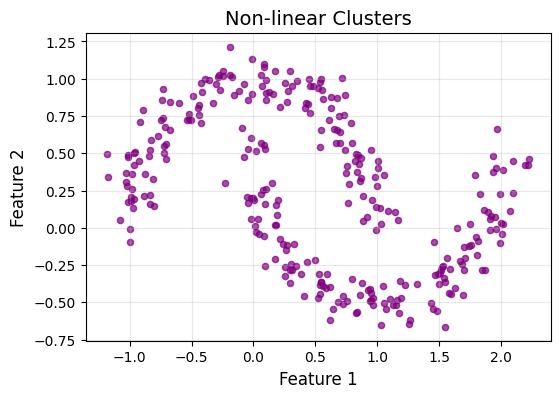

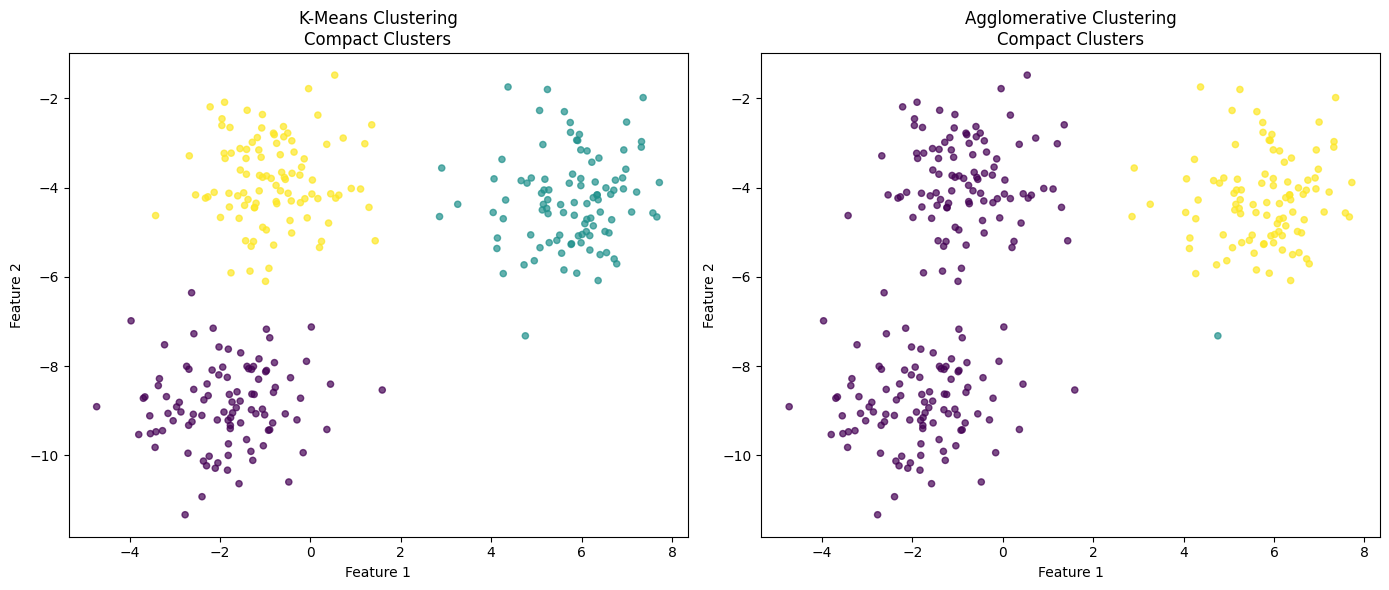

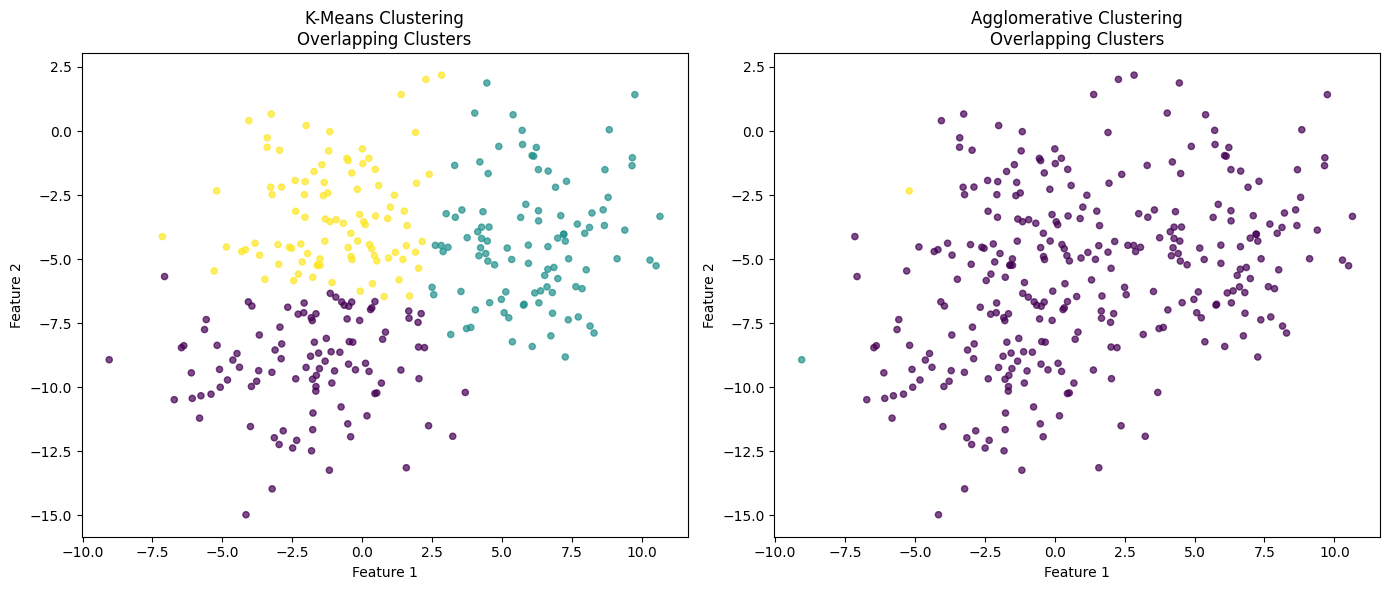

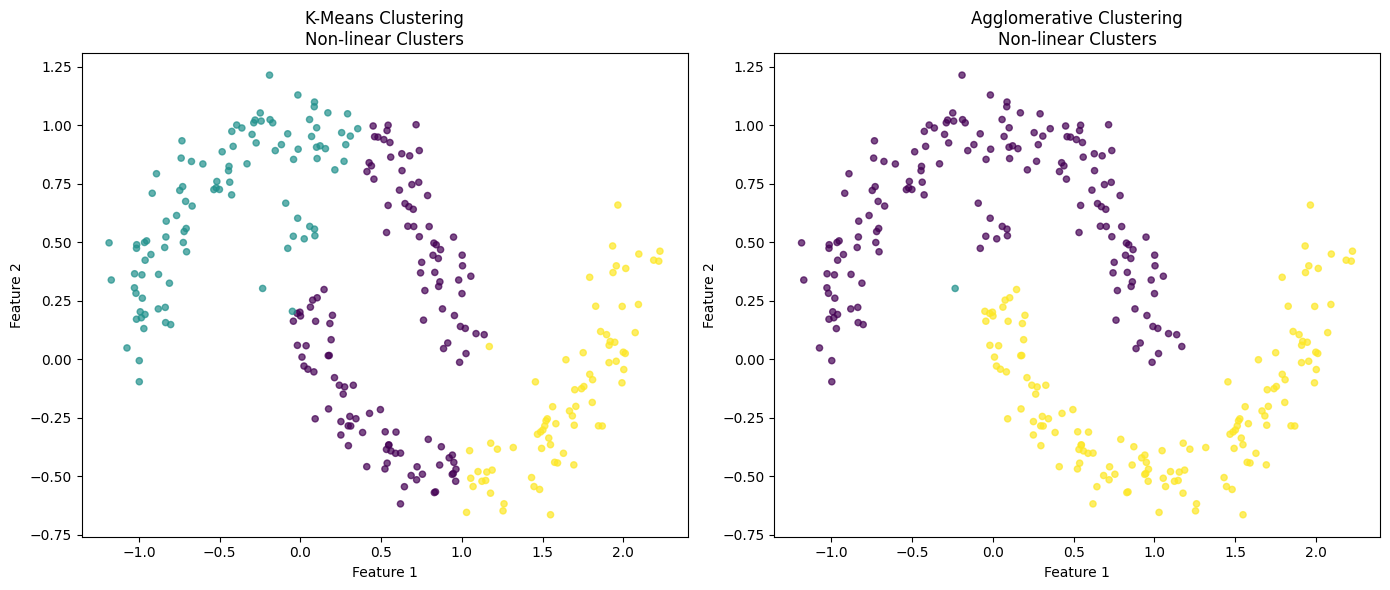

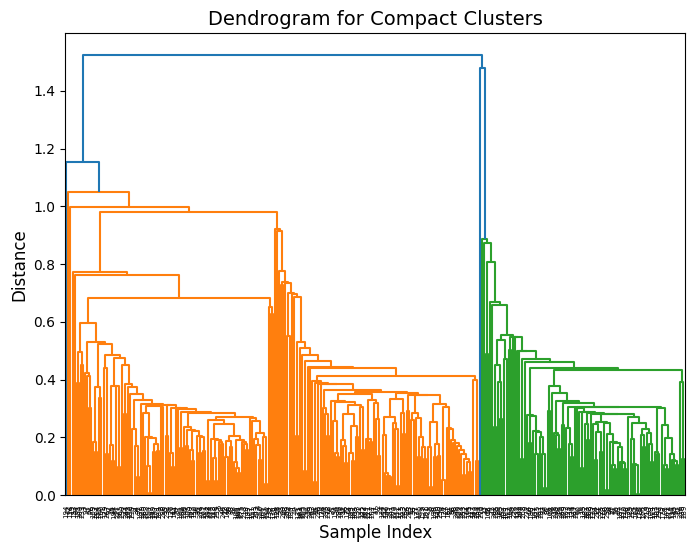

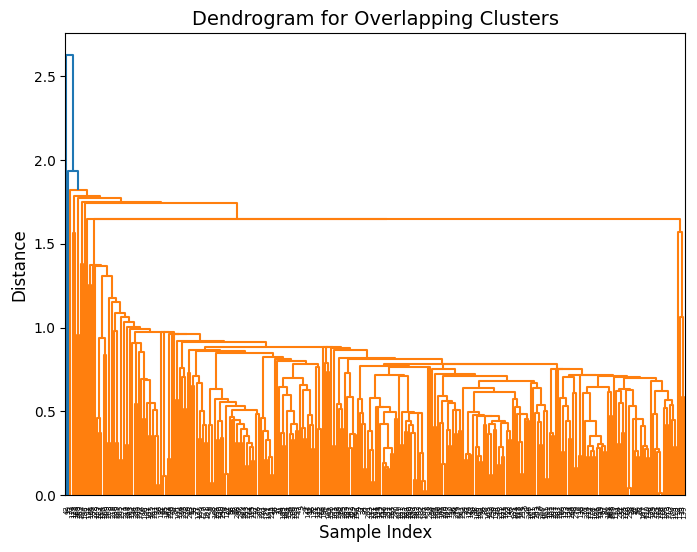

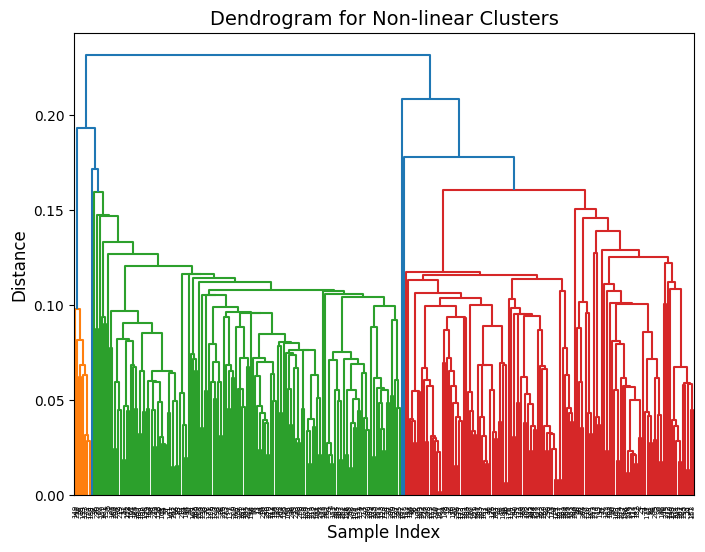


Silhouette Scores for KMeans:
Compact Clusters: 0.6801639803247453
Overlapping Clusters: 0.42039271907258213
Non-linear Clusters: 0.41643700099227277

Silhouette Scores for Agglomerative Clustering:
Compact Clusters: 0.4521465879665984
Overlapping Clusters: 0.08063123062272118
Non-linear Clusters: 0.02055674242129681


In [2]:
# Constants
N_SAMPLES = 300
N_CLUSTERS = 3
RANDOM_STATE = 40

# 1. Generate data with varying distributions
def generate_data():
    """
    Generates three different synthetic datasets: 
    - Compact clusters
    - Overlapping clusters
    - Non-linear clusters
    Returns:
        tuple: (data1, data2, data3) - Three datasets with varying characteristics.
    """
    data1, _ = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, cluster_std=1.0, random_state=RANDOM_STATE)
    data2, _ = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, cluster_std=2.5, random_state=RANDOM_STATE)
    data3, _ = make_moons(n_samples=N_SAMPLES, noise=0.1, random_state=RANDOM_STATE)
    return data1, data2, data3

data1, data2, data3 = generate_data()

# 2. Visualizing the data distributions
def plot_data(data, title):
    """
    Plots 2D data points.
    
    Args:
        data (array-like): Data to plot.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1], s=20, c='purple', alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

plot_data(data1, "Compact Clusters")
plot_data(data2, "Overlapping Clusters")
plot_data(data3, "Non-linear Clusters")

# 3. Perform clustering using KMeans and Agglomerative Clustering
def perform_clustering(data):
    """
    Applies KMeans and Agglomerative Clustering on the data.
    
    Args:
        data (array-like): Data to cluster.
        
    Returns:
        tuple: (KMeans labels, Agglomerative labels)
    """
    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE).fit(data)
    agglo = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='single').fit(data)
    return kmeans.labels_, agglo.labels_

kmeans_labels1, agglo_labels1 = perform_clustering(data1)
kmeans_labels2, agglo_labels2 = perform_clustering(data2)
kmeans_labels3, agglo_labels3 = perform_clustering(data3)

# 4. Plot clusters and compare methods
def plot_clusters(data, kmeans_labels, agglo_labels, title):
    """
    Plots the data points with clusters highlighted.
    
    Args:
        data (array-like): Data to plot.
        kmeans_labels (array-like): Cluster labels from KMeans.
        agglo_labels (array-like): Cluster labels from Agglomerative Clustering.
        title (str): Plot title.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.7)
    axes[0].set_title(f'K-Means Clustering\n{title}', fontsize=12)
    axes[0].set_xlabel('Feature 1', fontsize=10)
    axes[0].set_ylabel('Feature 2', fontsize=10)
    
    axes[1].scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='viridis', s=20, alpha=0.7)
    axes[1].set_title(f'Agglomerative Clustering\n{title}', fontsize=12)
    axes[1].set_xlabel('Feature 1', fontsize=10)
    axes[1].set_ylabel('Feature 2', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_clusters(data1, kmeans_labels1, agglo_labels1, "Compact Clusters")
plot_clusters(data2, kmeans_labels2, agglo_labels2, "Overlapping Clusters")
plot_clusters(data3, kmeans_labels3, agglo_labels3, "Non-linear Clusters")

# 5. Plot dendrogram for hierarchical clustering
def plot_dendrogram(data, title):
    """
    Plots the dendrogram for hierarchical clustering.
    
    Args:
        data (array-like): Data to perform clustering.
        title (str): Title of the dendrogram.
    """
    linked = linkage(data, method='single')
    plt.figure(figsize=(8, 6))
    dendrogram(linked)
    plt.title(title, fontsize=14)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.show()

plot_dendrogram(data1, "Dendrogram for Compact Clusters")
plot_dendrogram(data2, "Dendrogram for Overlapping Clusters")
plot_dendrogram(data3, "Dendrogram for Non-linear Clusters")

# 6. Calculate Silhouette Score to evaluate clustering quality
def evaluate_clustering(data, labels):
    """
    Evaluates clustering performance using silhouette score.
    
    Args:
        data (array-like): Data points.
        labels (array-like): Cluster labels for each data point.
        
    Returns:
        float: Silhouette score.
    """
    return silhouette_score(data, labels)

print("\nSilhouette Scores for KMeans:")
print("Compact Clusters:", evaluate_clustering(data1, kmeans_labels1))
print("Overlapping Clusters:", evaluate_clustering(data2, kmeans_labels2))
print("Non-linear Clusters:", evaluate_clustering(data3, kmeans_labels3))

print("\nSilhouette Scores for Agglomerative Clustering:")
print("Compact Clusters:", evaluate_clustering(data1, agglo_labels1))
print("Overlapping Clusters:", evaluate_clustering(data2, agglo_labels2))
print("Non-linear Clusters:", evaluate_clustering(data3, agglo_labels3))

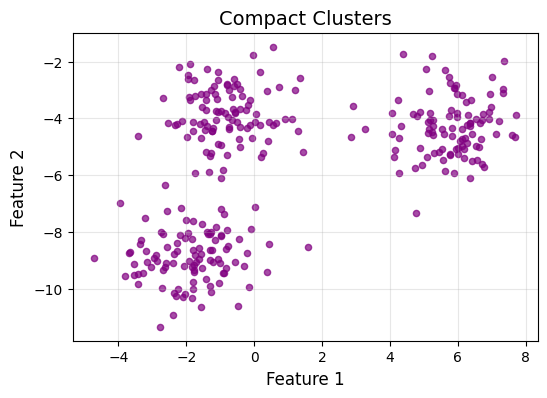

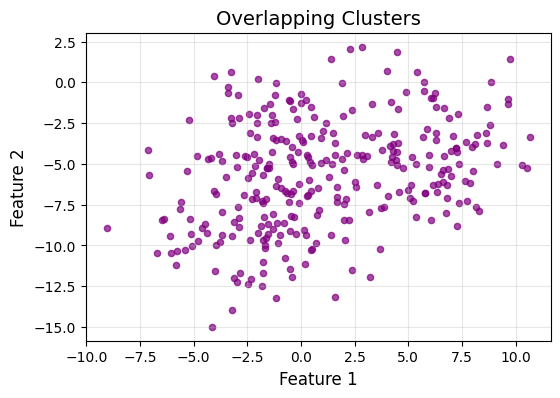

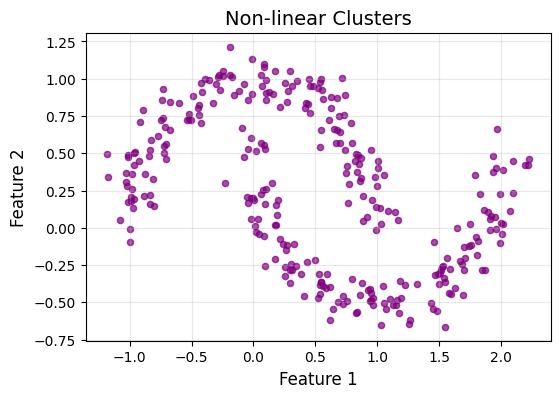

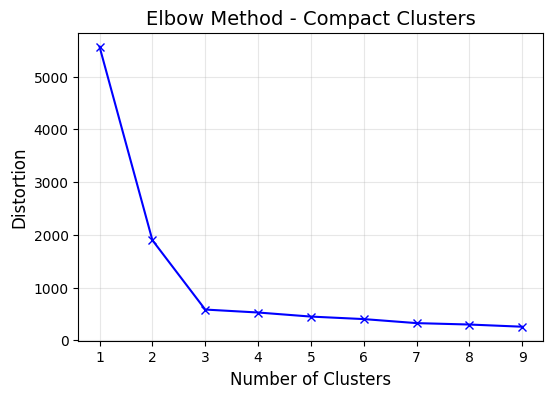

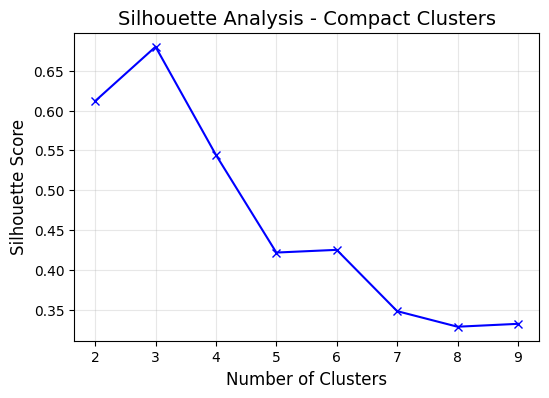

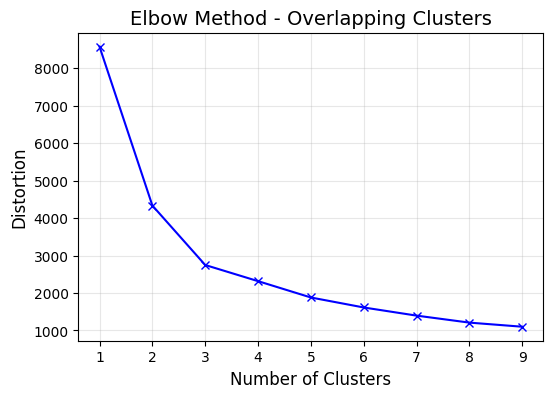

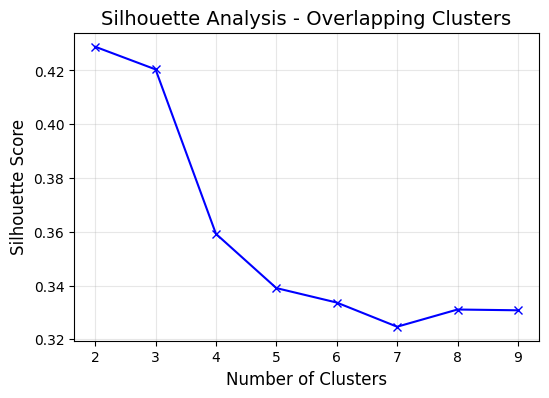

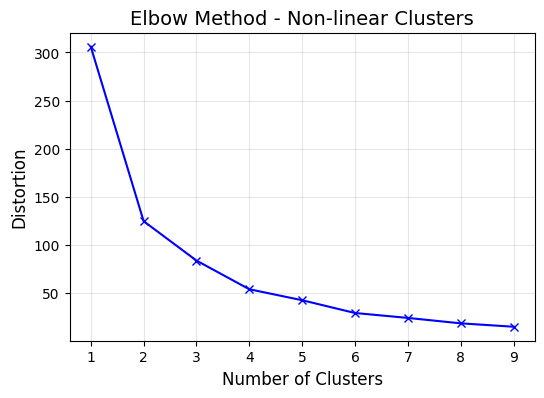

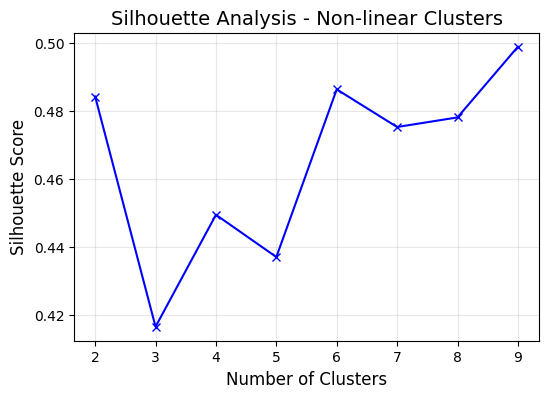

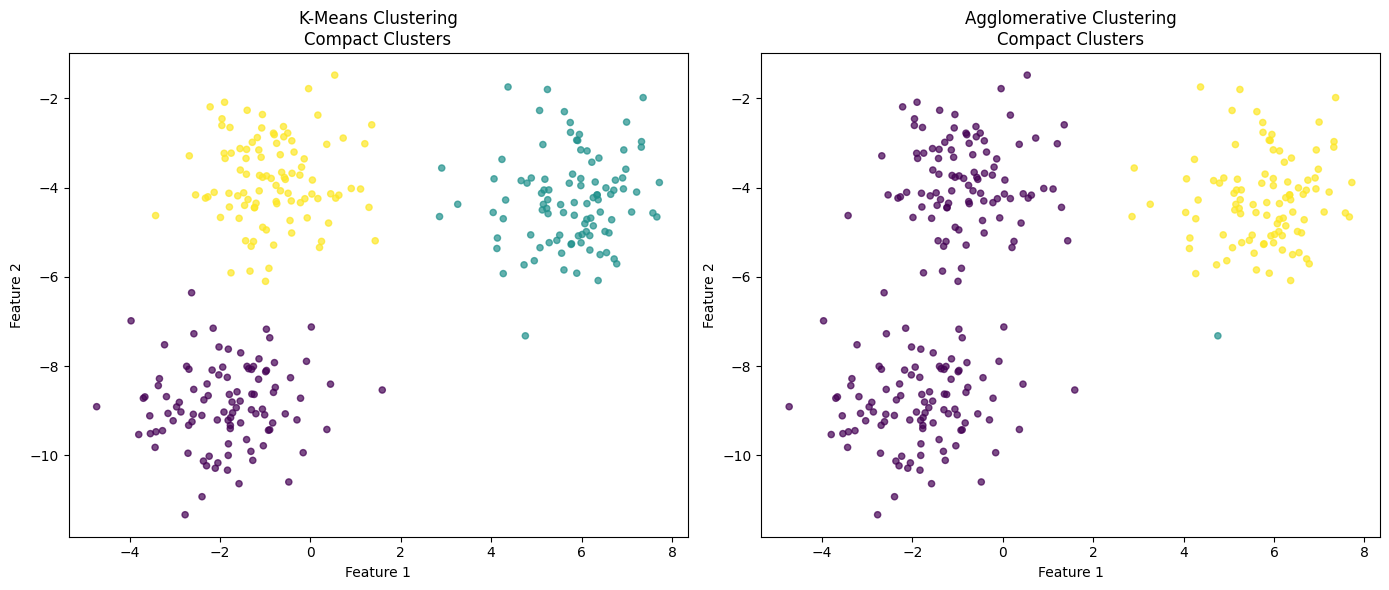

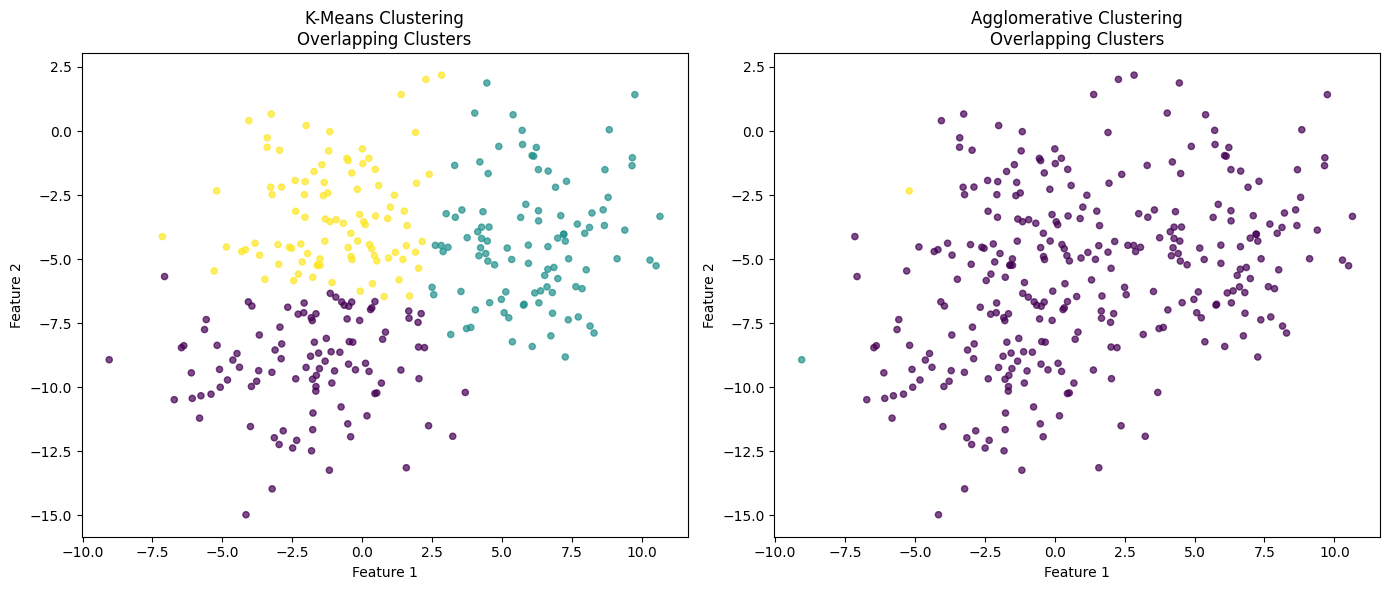

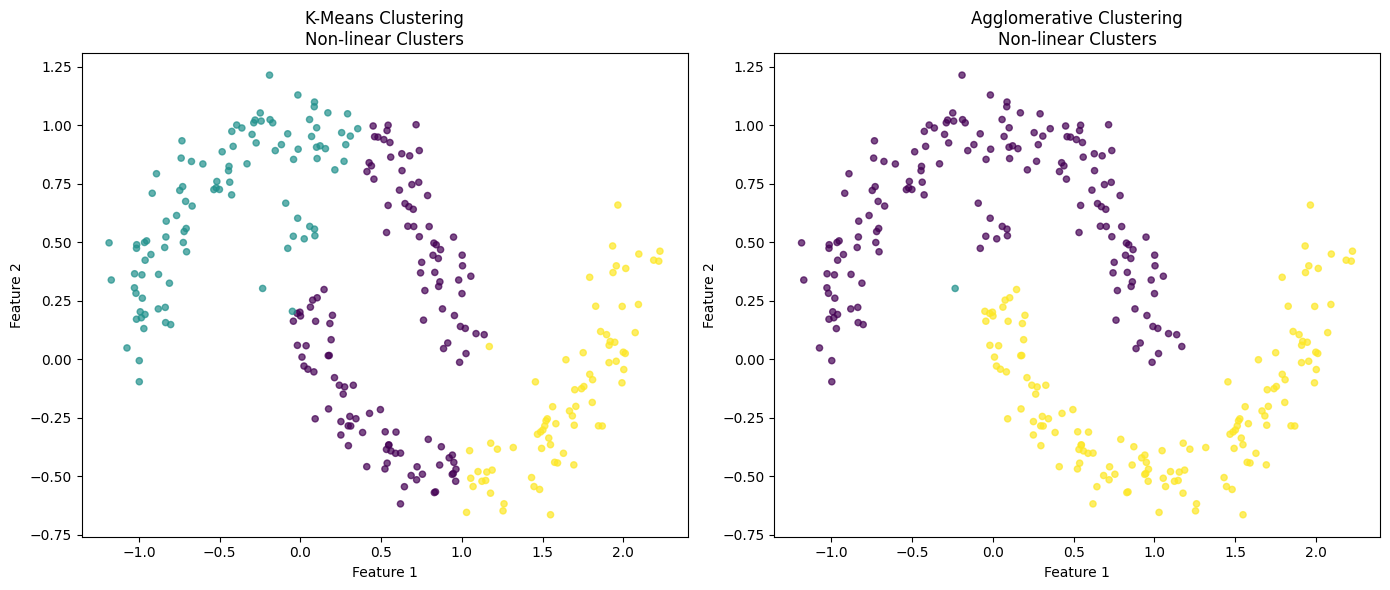

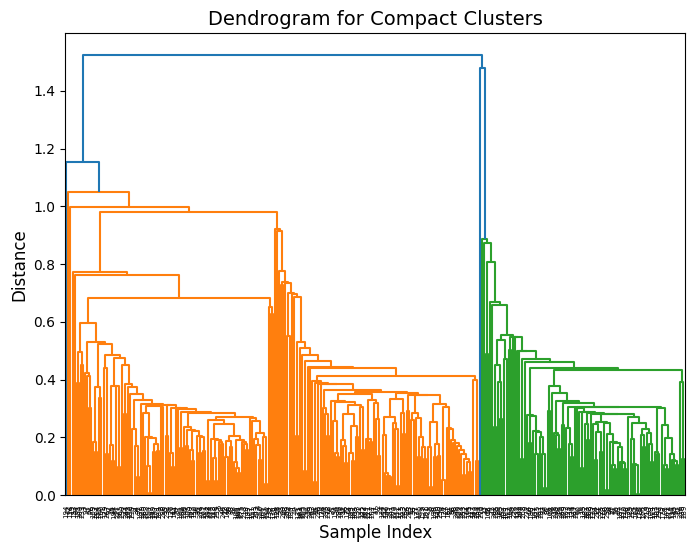

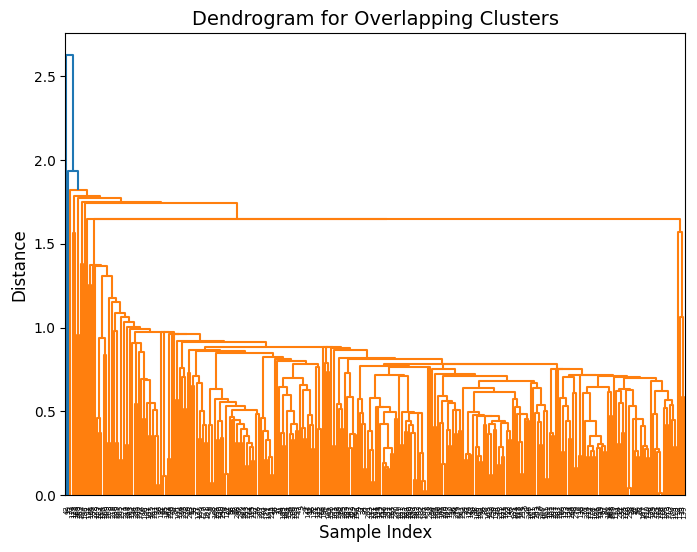

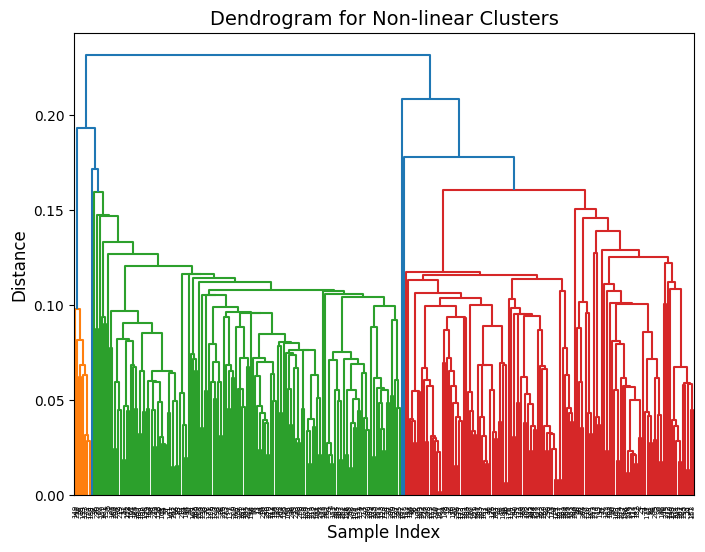


Silhouette Scores for KMeans:
Compact Clusters: 0.6801639803247453
Overlapping Clusters: 0.42039271907258213
Non-linear Clusters: 0.41643700099227277

Silhouette Scores for Agglomerative Clustering:
Compact Clusters: 0.4521465879665984
Overlapping Clusters: 0.08063123062272118
Non-linear Clusters: 0.02055674242129681


In [3]:
# Constants
N_SAMPLES = 300
N_CLUSTERS = 3
RANDOM_STATE = 40

# 1. Generate data with varying distributions
def generate_data():
    """
    Generates three different synthetic datasets: 
    - Compact clusters
    - Overlapping clusters
    - Non-linear clusters
    Returns:
        tuple: (data1, data2, data3) - Three datasets with varying characteristics.
    """
    data1, _ = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, cluster_std=1.0, random_state=RANDOM_STATE)
    data2, _ = make_blobs(n_samples=N_SAMPLES, centers=N_CLUSTERS, cluster_std=2.5, random_state=RANDOM_STATE)
    data3, _ = make_moons(n_samples=N_SAMPLES, noise=0.1, random_state=RANDOM_STATE)
    return data1, data2, data3

data1, data2, data3 = generate_data()

# 2. Visualizing the data distributions
def plot_data(data, title):
    """
    Plots 2D data points.
    
    Args:
        data (array-like): Data to plot.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1], s=20, c='purple', alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

plot_data(data1, "Compact Clusters")
plot_data(data2, "Overlapping Clusters")
plot_data(data3, "Non-linear Clusters")

# 1.2 Determine optimal number of clusters using Elbow Method and Silhouette Analysis
def elbow_method(data, title):
    """
    Computes distortions for different cluster counts and plots the Elbow Method graph.
    
    Args:
        data (array-like): Data to cluster.
        title (str): Title for the plot.
    """
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bx-')
    plt.title(f'Elbow Method - {title}', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

def silhouette_analysis(data, title):
    """
    Computes silhouette scores for different cluster counts and plots the Silhouette Analysis graph.
    
    Args:
        data (array-like): Data to cluster.
        title (str): Title for the plot.
    """
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.title(f'Silhouette Analysis - {title}', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Apply Elbow Method and Silhouette Analysis
elbow_method(data1, "Compact Clusters")
silhouette_analysis(data1, "Compact Clusters")

elbow_method(data2, "Overlapping Clusters")
silhouette_analysis(data2, "Overlapping Clusters")

elbow_method(data3, "Non-linear Clusters")
silhouette_analysis(data3, "Non-linear Clusters")

# 3. Perform clustering using KMeans and Agglomerative Clustering
def perform_clustering(data):
    """
    Applies KMeans and Agglomerative Clustering on the data.
    
    Args:
        data (array-like): Data to cluster.
        
    Returns:
        tuple: (KMeans labels, Agglomerative labels)
    """
    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE).fit(data)
    agglo = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='single').fit(data)
    return kmeans.labels_, agglo.labels_

kmeans_labels1, agglo_labels1 = perform_clustering(data1)
kmeans_labels2, agglo_labels2 = perform_clustering(data2)
kmeans_labels3, agglo_labels3 = perform_clustering(data3)

# 4. Plot clusters and compare methods
def plot_clusters(data, kmeans_labels, agglo_labels, title):
    """
    Plots the data points with clusters highlighted.
    
    Args:
        data (array-like): Data to plot.
        kmeans_labels (array-like): Cluster labels from KMeans.
        agglo_labels (array-like): Cluster labels from Agglomerative Clustering.
        title (str): Plot title.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=20, alpha=0.7)
    axes[0].set_title(f'K-Means Clustering\n{title}', fontsize=12)
    axes[0].set_xlabel('Feature 1', fontsize=10)
    axes[0].set_ylabel('Feature 2', fontsize=10)
    
    axes[1].scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='viridis', s=20, alpha=0.7)
    axes[1].set_title(f'Agglomerative Clustering\n{title}', fontsize=12)
    axes[1].set_xlabel('Feature 1', fontsize=10)
    axes[1].set_ylabel('Feature 2', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_clusters(data1, kmeans_labels1, agglo_labels1, "Compact Clusters")
plot_clusters(data2, kmeans_labels2, agglo_labels2, "Overlapping Clusters")
plot_clusters(data3, kmeans_labels3, agglo_labels3, "Non-linear Clusters")

# 5. Plot dendrogram for hierarchical clustering
def plot_dendrogram(data, title):
    """
    Plots the dendrogram for hierarchical clustering.
    
    Args:
        data (array-like): Data to perform clustering.
        title (str): Title of the dendrogram.
    """
    linked = linkage(data, method='single')
    plt.figure(figsize=(8, 6))
    dendrogram(linked)
    plt.title(title, fontsize=14)
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.show()

plot_dendrogram(data1, "Dendrogram for Compact Clusters")
plot_dendrogram(data2, "Dendrogram for Overlapping Clusters")
plot_dendrogram(data3, "Dendrogram for Non-linear Clusters")

# 6. Calculate Silhouette Score to evaluate clustering quality
def evaluate_clustering(data, labels):
    """
    Evaluates clustering performance using silhouette score.
    
    Args:
        data (array-like): Data points.
        labels (array-like): Cluster labels for each data point.
        
    Returns:
        float: Silhouette score.
    """
    return silhouette_score(data, labels)

print("\nSilhouette Scores for KMeans:")
print("Compact Clusters:", evaluate_clustering(data1, kmeans_labels1))
print("Overlapping Clusters:", evaluate_clustering(data2, kmeans_labels2))
print("Non-linear Clusters:", evaluate_clustering(data3, kmeans_labels3))

print("\nSilhouette Scores for Agglomerative Clustering:")
print("Compact Clusters:", evaluate_clustering(data1, agglo_labels1))
print("Overlapping Clusters:", evaluate_clustering(data2, agglo_labels2))
print("Non-linear Clusters:", evaluate_clustering(data3, agglo_labels3))

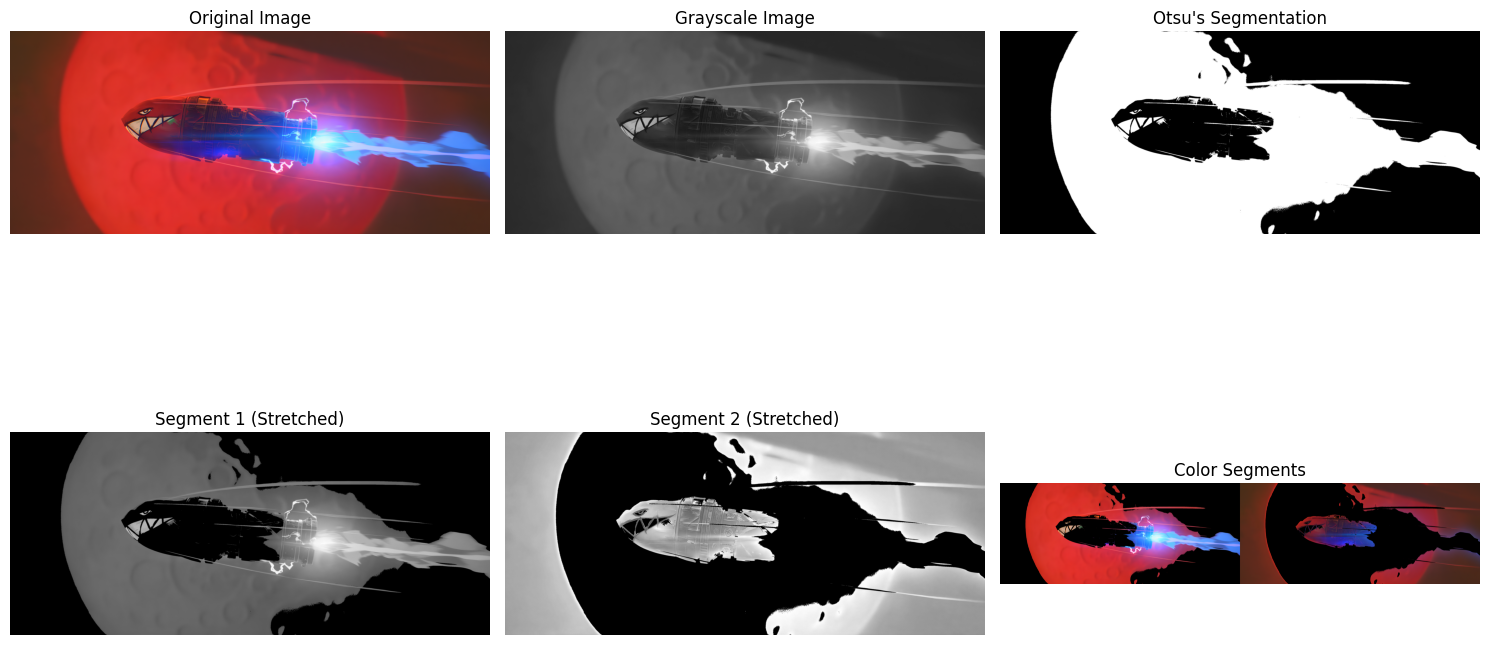

In [4]:
def load_image(image_path):
    """Loads an image and converts it to RGB.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: Image in RGB format.
    """
    image_bgr = cv2.imread(image_path)
    return cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


def convert_to_grayscale(image):
    """Converts an RGB image to grayscale.

    Args:
        image (np.ndarray): Input RGB image.

    Returns:
        np.ndarray: Grayscale image.
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


def otsu_segmentation(gray_image):
    """Applies Otsu's thresholding to segment a grayscale image.

    Args:
        gray_image (np.ndarray): Input grayscale image.

    Returns:
        tuple: Otsu's threshold value and binary segmented image.
    """
    threshold, binary_image = cv2.threshold(
        gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    return threshold, binary_image


def extract_segments(gray_image, binary_image):
    """Extracts two segments from a grayscale image based on a binary mask.

    Args:
        gray_image (np.ndarray): Grayscale image.
        binary_image (np.ndarray): Binary mask image.

    Returns:
        tuple: Two grayscale segments.
    """
    segment1 = np.where(binary_image == 255, gray_image, 0)
    segment2 = np.where(binary_image == 0, gray_image, 0)
    return segment1, segment2


def stretch_histogram(segment):
    """Stretches the histogram of a grayscale image segment.

    Args:
        segment (np.ndarray): Input image segment.

    Returns:
        np.ndarray: Histogram-stretched segment.
    """
    return cv2.normalize(segment, None, 0, 255, cv2.NORM_MINMAX)


def extract_color_segments(image_rgb, binary_image):
    """Extracts color segments from an RGB image based on a binary mask.

    Args:
        image_rgb (np.ndarray): Input RGB image.
        binary_image (np.ndarray): Binary mask image.

    Returns:
        tuple: Two color segments.
    """
    mask1 = (binary_image == 255).astype(np.uint8)
    mask2 = (binary_image == 0).astype(np.uint8)
    segment1 = cv2.bitwise_and(image_rgb, image_rgb, mask=mask1)
    segment2 = cv2.bitwise_and(image_rgb, image_rgb, mask=mask2)
    return segment1, segment2


def display_results(image_rgb, gray_image, binary_image, segment1, segment2, color_segment1, color_segment2):
    """Displays the results of image segmentation.

    Args:
        image_rgb (np.ndarray): Original RGB image.
        gray_image (np.ndarray): Grayscale image.
        binary_image (np.ndarray): Binary segmented image.
        segment1 (np.ndarray): First grayscale segment.
        segment2 (np.ndarray): Second grayscale segment.
        color_segment1 (np.ndarray): First color segment.
        color_segment2 (np.ndarray): Second color segment.
    """
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Grayscale Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title("Otsu's Segmentation")
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Segment 1 (Stretched)')
    plt.imshow(segment1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Segment 2 (Stretched)')
    plt.imshow(segment2, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('Color Segments')
    plt.imshow(np.hstack((color_segment1, color_segment2)))
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Main Execution
image_path = "img.png"

# Load and preprocess image
image_rgb = load_image(image_path)
gray_image = convert_to_grayscale(image_rgb)

# Perform Otsu's segmentation
otsu_threshold, binary_segment = otsu_segmentation(gray_image)

# Extract grayscale segments
segment1, segment2 = extract_segments(gray_image, binary_segment)

# Stretch histograms
segment1_stretched = stretch_histogram(segment1)
segment2_stretched = stretch_histogram(segment2)

# Extract color segments
color_segment1, color_segment2 = extract_color_segments(image_rgb, binary_segment)

# Display results
display_results(
    image_rgb, gray_image, binary_segment, segment1_stretched, segment2_stretched, color_segment1, color_segment2
)